# Import libraries :open_file_folder:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb

from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Read CSV file :scroll:

In [2]:
df = pd.read_csv("../../csv/alpha0.csv")
df

,address_name,price,square_price,floors,rooms,area,city,type_home,remont,balcon,url
0,"Автомобильный проезд, 4",12000000,342857,10,1,35.0,Москва,layout,standard,1,8e836ea8-0965-41d4-b259-6db653ca0d86
1,Южнопортовая улица,13500000,548780,4,1,24.6,Москва,layout,without_repair,1,3b9c8b80-48d5-4008-9e18-20f884dedfe0
2,жилой комплекс Режиссёр,21600000,574468,18,1,37.6,Москва,layout,without_repair,1,f69ae35e-8cac-4cf3-a408-5e40bb87ee54
3,"Строительный проезд, 9с11",17000000,410628,9,1,41.4,Москва,layout,without_repair,1,8cf6c292-a9f2-46d2-992f-a661abe38210
4,"улица Каховка, 5к5",16000000,350109,7,1,45.7,Москва,flat,design,1,8bca1f98-3dc5-4788-b886-25d464a7d937
...,...,...,...,...,...,...,...,...,...,...,...
52869,"Кузоватовская улица, 25А",4470000,140125,8,1,31.9,Ульяновск,flat,well_done,1,92d6b6ad-bd8c-49da-9dc9-6d4dc48c6fd3
52870,"улица Цвиллинга, 7А/2",12999000,170366,32,3,76.3,Екатеринбург,flat,without_repair,1,025d771b-ea99-41e3-9488-8f1112b43eb8
52871,"Октябрьский проспект, 405",6750000,156976,5,2,43.0,Люберцы,flat,well_done,1,15f17a3a-95cc-48ca-83ee-0e90a83874ee
52872,"улица Хохрякова, 66",24000000,314547,3,3,76.3,Екатеринбург,flat,without_repair,1,4ecaacfb-8018-4137-a867-bcc62d1f17ad


# Exploratory Data Analysis (EDA) :gem: :mag:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52874 entries, 0 to 52873
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address_name  52874 non-null  object 
 1   price         52874 non-null  int64  
 2   square_price  52874 non-null  int64  
 3   floors        52874 non-null  int64  
 4   rooms         52874 non-null  int64  
 5   area          52874 non-null  float64
 6   city          52874 non-null  object 
 7   type_home     52874 non-null  object 
 8   remont        52874 non-null  object 
 9   balcon        52874 non-null  int64  
 10  url           52874 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 4.4+ MB


In [4]:
df.describe()

,price,square_price,floors,rooms,area,balcon
count,5.287400e+04,5.287400e+04,52874.000000,52874.000000,52874.000000,52874.000000
mean,8.448709e+06,1.512740e+05,5.604853,1.912547,53.198497,1.069164
std,1.246245e+07,1.096345e+05,4.139966,0.859744,22.286941,0.253736
min,3.300000e+05,7.560000e+03,1.000000,1.000000,10.000000,1.000000
25%,4.100000e+06,9.003350e+04,3.000000,1.000000,38.700000,1.000000
50%,5.850000e+06,1.172580e+05,5.000000,2.000000,47.700000,1.000000
75%,9.200000e+06,1.727905e+05,7.000000,3.000000,61.900000,1.000000
max,6.657045e+08,3.277717e+06,48.000000,4.000000,433.000000,2.000000


In [5]:
df.isna().sum()

address_name    0
price           0
square_price    0
floors          0
rooms           0
area            0
city            0
type_home       0
remont          0
balcon          0
url             0
dtype: int64

In [6]:
df.duplicated().sum()

0

# Visualization (graphics)

delete temporary columns

In [7]:
df = df.drop(["address_name", "url", "square_price"], axis=1)

In [8]:
count_rooms = df['rooms'].value_counts()
count_rooms

rooms
1    20094
2    19271
3    11548
4     1961
Name: count, dtype: int64

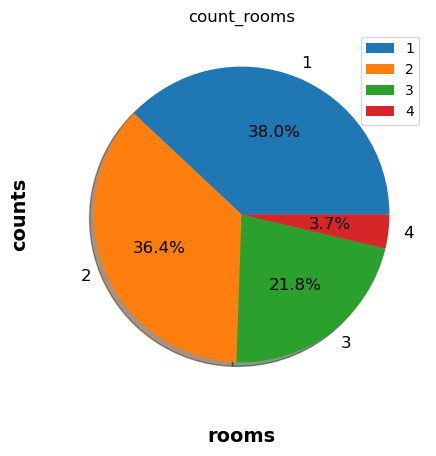

In [9]:
plt.figure()
explode = (0,0.09)
count_rooms.plot(kind = 'pie', fontsize = 12, autopct = '%.1f%%',shadow = True)
plt.title('count_rooms')
plt.xlabel('rooms', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = count_rooms.index, loc = "best")
plt.show()

In [10]:
count_remont = df['remont'].value_counts()
count_remont

remont
standard          26810
well_done         13427
without_repair     6914
design             5448
simple              275
Name: count, dtype: int64

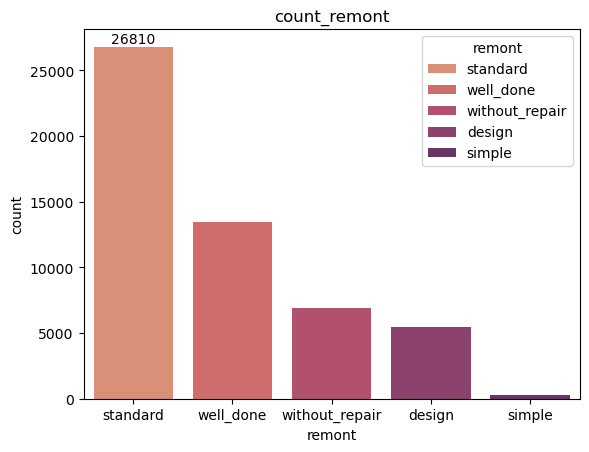

In [11]:
plt.figure()
ax=sns.barplot(x=count_remont.index,y=count_remont.values, palette='flare', legend=True, hue=count_remont.index)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('count_remont')
plt.xlabel('remont')
plt.ylabel('count')
plt.show()

In [12]:
count_type_home = df['type_home'].value_counts()
count_type_home

type_home
flat      51752
layout     1122
Name: count, dtype: int64

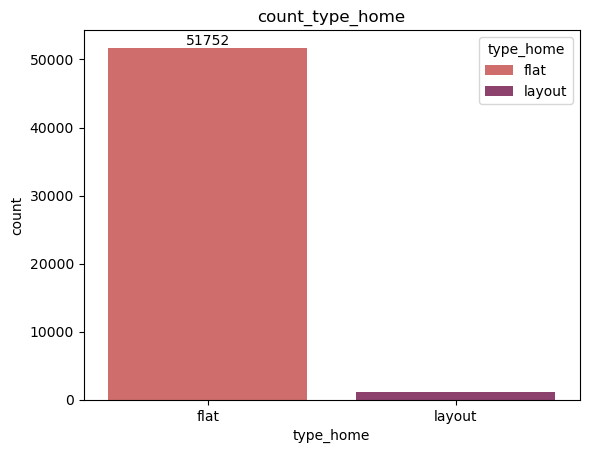

In [13]:
plt.figure()
ax=sns.barplot(x=count_type_home.index,y=count_type_home.values, palette='flare', legend=True, hue=count_type_home.index)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('count_type_home')
plt.xlabel('type_home')
plt.ylabel('count')
plt.show()

In [14]:
count_balcon = df['balcon'].value_counts()
count_balcon

balcon
1    49217
2     3657
Name: count, dtype: int64

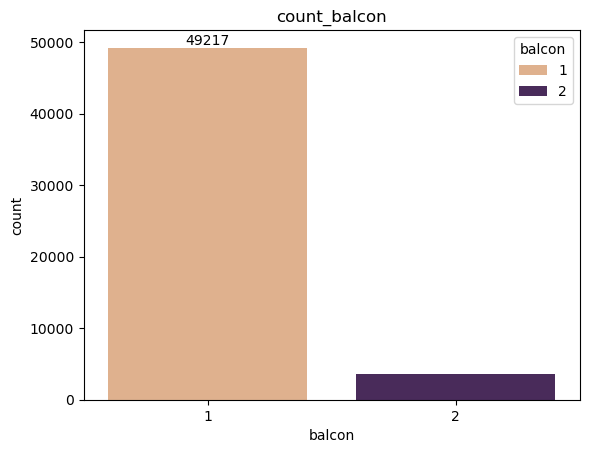

In [15]:
plt.figure()
ax=sns.barplot(x=count_balcon.index,y=count_balcon.values, palette='flare', legend=True, hue=count_balcon.index)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('count_balcon')
plt.xlabel('balcon')
plt.ylabel('count')
plt.show()

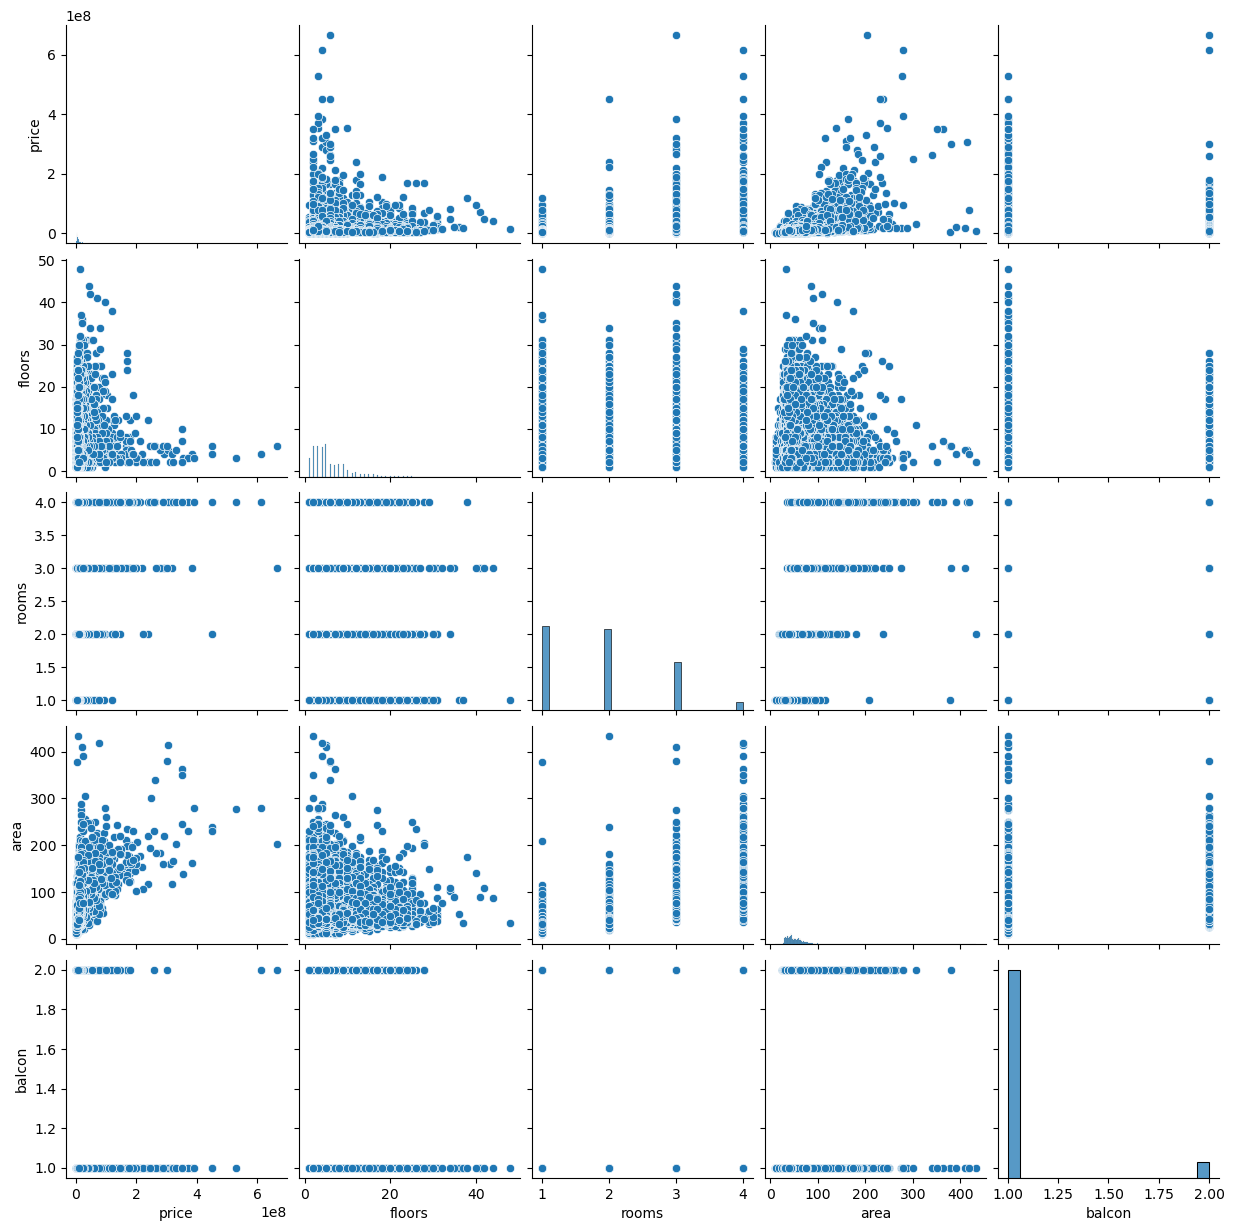

In [16]:
sns.pairplot(df)

<Axes: xlabel='rooms', ylabel='price'>

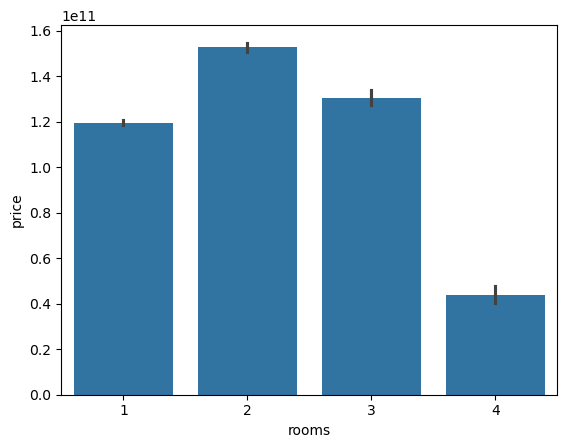

In [17]:
sns.barplot(data=df, x="rooms", y="price", estimator=np.sum)

<Axes: xlabel='floors', ylabel='price'>

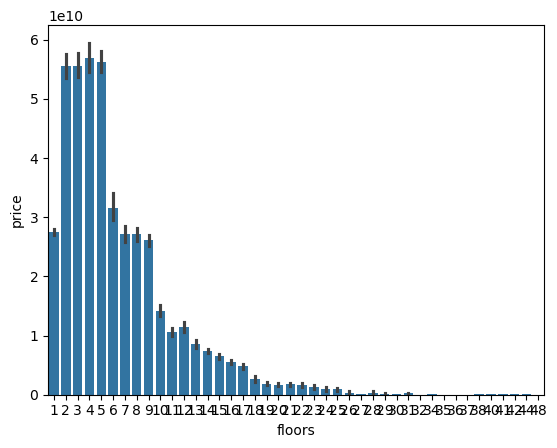

In [18]:
sns.barplot(data=df, x="floors", y="price", estimator=np.sum)

<Axes: xlabel='balcon', ylabel='price'>

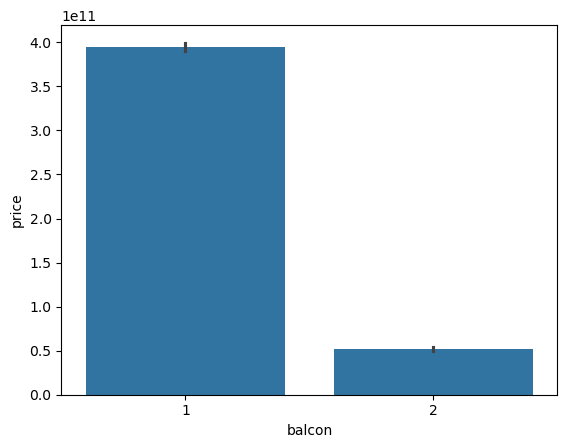

In [19]:
sns.barplot(data=df, x="balcon", y="price", estimator=np.sum)

<Axes: xlabel='price', ylabel='area'>

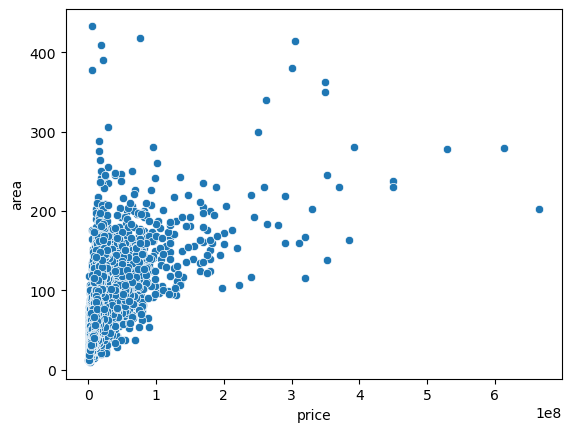

In [20]:
sns.scatterplot(data=df, x="price", y="area")

# Encoding Data :bomb:

In [21]:
le = LabelEncoder()
columns = ["price", "floors", "rooms", "area", "city", "type_home", "remont", "balcon"]
for column in columns:
    df[column]=le.fit_transform(df[column])


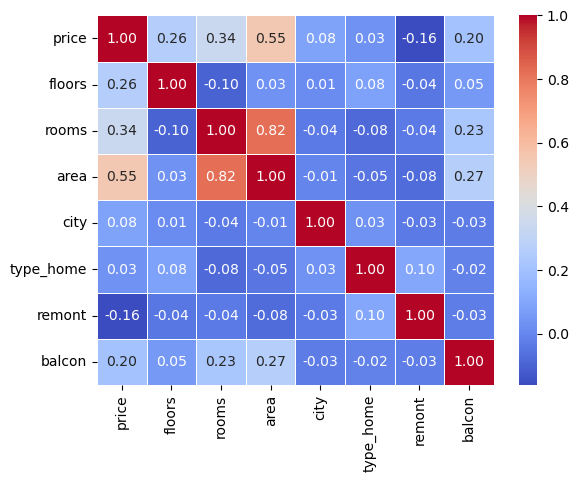

In [22]:
plt.figure()
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.show()

In [23]:
df

,price,floors,rooms,area,city,type_home,remont,balcon
0,2155,9,0,327,51,1,2,0
1,2287,3,0,110,51,1,4,0
2,2732,17,0,439,51,1,4,0
3,2534,8,0,584,51,1,4,0
4,2468,6,0,739,51,0,0,0
...,...,...,...,...,...,...,...,...
52869,739,7,0,225,98,0,3,0
52870,2238,31,2,1354,20,0,4,0
52871,1345,4,1,648,47,0,3,0
52872,2813,2,2,1354,20,0,4,0


# :star: Features & Target :dart: 

In [24]:
x = df.drop(columns=['price'])
y = df['price']

In [25]:
y

0        2155
1        2287
2        2732
3        2534
4        2468
         ... 
52869     739
52870    2238
52871    1345
52872    2813
52873    1773
Name: price, Length: 52874, dtype: int64

In [26]:
y=y.values.reshape(-1,1)
y

array([[2155],
       [2287],
       [2732],
       ...,
       [1345],
       [2813],
       [1773]])

# :mag: Scaling and split :scissors:

In [27]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

# Teach Models :books:

In [28]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
    'CatBoost': CatBoostRegressor()
}

Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR', 'CatBoost']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 0.03150195546904525
Mean Absolute Error (MAE): 0.14393834106301667
R-squared Score: 0.40769275927840265

Results for Decision Tree:
Mean Squared Error (MSE): 0.013053616690892698
Mean Absolute Error (MAE): 0.08263189398403055
R-squared Score: 0.7545628019435972



/Users/kevin/anaconda3/envs/asosn_ml/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Results for Random Forest:
Mean Squared Error (MSE): 0.007500663756423334
Mean Absolute Error (MAE): 0.06369952265039723
R-squared Score: 0.8589707404826623



/Users/kevin/anaconda3/envs/asosn_ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Results for SVR:
Mean Squared Error (MSE): 0.026211411258456458
Mean Absolute Error (MAE): 0.1278774878411144
R-squared Score: 0.5071668267333156

Results for XGBoost:
Mean Squared Error (MSE): 0.005822990037021017
Mean Absolute Error (MAE): 0.05656442811595448
R-squared Score: 0.8905147597911387

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 455
[LightGBM] [Info] Number of data points in the train set: 42299, number of used features: 7
[LightGBM] [Info] Start training from score 0.376208


/Users/kevin/anaconda3/envs/asosn_ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Results for LightGBM:
Mean Squared Error (MSE): 0.006344038418184142
Mean Absolute Error (MAE): 0.059604686518293676
R-squared Score: 0.8807178845072394



/Users/kevin/anaconda3/envs/asosn_ml/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Results for Gradient Boosting Regressor:
Mean Squared Error (MSE): 0.009694328188128602
Mean Absolute Error (MAE): 0.07633923862552847
R-squared Score: 0.8177249413801523



/Users/kevin/anaconda3/envs/asosn_ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Results for ADA Boost:
Mean Squared Error (MSE): 0.02506276475229547
Mean Absolute Error (MAE): 0.1354030601451216
R-squared Score: 0.5287639508641413

Results for K Neighbors Regressor:
Mean Squared Error (MSE): 0.01799407394893207
Mean Absolute Error (MAE): 0.09882901425774528
R-squared Score: 0.6616711524303558

Results for Linear SVR:
Mean Squared Error (MSE): 0.032652898803258175
Mean Absolute Error (MAE): 0.14035355025579516
R-squared Score: 0.38605244964161056



/Users/kevin/anaconda3/envs/asosn_ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevin/anaconda3/envs/asosn_ml/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Learning rate set to 0.073984
0:	learn: 0.2202859	total: 64.7ms	remaining: 1m 4s
1:	learn: 0.2108532	total: 73.5ms	remaining: 36.7s
2:	learn: 0.2023784	total: 80.5ms	remaining: 26.8s
3:	learn: 0.1942056	total: 89.2ms	remaining: 22.2s
4:	learn: 0.1874709	total: 95.8ms	remaining: 19.1s
5:	learn: 0.1812121	total: 103ms	remaining: 17.1s
6:	learn: 0.1758352	total: 125ms	remaining: 17.8s
7:	learn: 0.1708352	total: 133ms	remaining: 16.5s
8:	learn: 0.1664915	total: 137ms	remaining: 15.1s
9:	learn: 0.1622549	total: 141ms	remaining: 13.9s
10:	learn: 0.1584855	total: 148ms	remaining: 13.3s
11:	learn: 0.1553334	total: 157ms	remaining: 12.9s
12:	learn: 0.1522933	total: 162ms	remaining: 12.3s
13:	learn: 0.1485545	total: 165ms	remaining: 11.6s
14:	learn: 0.1465561	total: 167ms	remaining: 10.9s
15:	learn: 0.1442231	total: 169ms	remaining: 10.4s
16:	learn: 0.1419832	total: 171ms	remaining: 9.87s
17:	learn: 0.1402383	total: 173ms	remaining: 9.43s
18:	learn: 0.1383558	total: 175ms	remaining: 9.03s
19:	le

# Save model :floppy_disk:

In [29]:
model.save_model("../../models/alpha0.bin")